<a href="https://colab.research.google.com/github/lalurisgan/Regresi-_Linear_ML/blob/main/DisicionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengimpor library pandas untuk manipulasi dan analisis data.
import pandas as pd
# Mengimpor library matplotlib untuk visualisasi data.
import matplotlib.pyplot as plt
# Mengimpor fungsi train_test_split dari sklearn untuk membagi data menjadi data latih dan data uji.
from sklearn.model_selection import train_test_split
# Mengimpor kelas DecisionTreeClassifier dari sklearn untuk membuat model pohon keputusan.
from sklearn.tree import DecisionTreeClassifier
# Mengimpor fungsi accuracy_score dan classification_report dari sklearn untuk mengevaluasi kinerja model.
from sklearn.metrics import accuracy_score, classification_report
# Mengimpor kelas LabelEncoder dari sklearn untuk mengubah data kategorikal menjadi numerik.
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Mengimpor library pandas dan memberikan alias 'pd' untuk penggunaan yang lebih singkat.
import pandas as pd

# 'dataset' adalah variabel yang akan menyimpan data.
# pd.read_csv() digunakan untuk membaca data dari file CSV bernama 'K01_heart_disease.csv' dan menyimpannya ke dalam 'dataset'.
dataset = pd.read_csv('K01_heart_disease.csv')

# print(dataset.info()) menampilkan informasi ringkas tentang dataset,
# seperti jumlah baris, kolom, tipe data setiap kolom, dan jumlah data non-null.
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [ ]:
# dataset.info() adalah fungsi yang menampilkan ringkasan informasi tentang DataFrame 'dataset'.
# Ringkasan ini meliputi:
# - Jumlah baris dan kolom dalam dataset.
# - Nama kolom dan tipe data masing-masing kolom.
# - Jumlah nilai non-null di setiap kolom.
# - Penggunaan memori oleh DataFrame.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Mendefinisikan variabel 'categorical_features' untuk menyimpan daftar fitur kategorikal.
categorical_features =[feature for feature in dataset.columns # Melakukan iterasi melalui setiap 'feature' (kolom) dalam 'dataset.columns' (daftar kolom dataset).
                       if dataset[feature].dtypes == "O"] # Jika tipe data dari 'feature' tersebut adalah "O" (object), yang menandakan data kategorikal,
                                                           # maka 'feature' tersebut akan dimasukkan ke dalam list 'categorical_features'.

# Menampilkan subset dari dataset yang hanya berisi kolom-kolom yang teridentifikasi sebagai fitur kategorikal.
dataset[categorical_features] # 'dataset[categorical_features]' digunakan untuk memilih dan menampilkan hanya kolom-kolom yang ada di dalam list 'categorical_features' dari dataset.

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


In [ ]:
# Melakukan iterasi (looping) untuk setiap elemen 'i' dalam list 'categorical_features'.
for i in categorical_features:
    # 'i' pada setiap iterasi akan merepresentasikan salah satu nama kolom (fitur kategorikal) dari dataset.

    # Mencetak nilai-nilai unik yang ada dalam kolom 'i' pada dataset.
    # dataset[i] : Memilih kolom dengan nama 'i' dari dataset.
    # .unique()  : Mengambil semua nilai unik dari kolom tersebut.
    print(dataset[i].unique())
    # Outputnya akan menampilkan daftar nilai unik untuk setiap fitur kategorikal yang ada dalam dataset.

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


In [ ]:
# Membuat dictionary kosong untuk menyimpan LabelEncoder untuk setiap kolom kategorikal.
label_encoders = {}

# Melakukan iterasi (looping) untuk setiap kolom (column) dalam dataset yang bertipe data 'object' (kategorikal).
# dataset.select_dtypes(include=['object']).columns: Memilih kolom-kolom dengan tipe data 'object'.
for column in dataset.select_dtypes(include=['object']).columns:
    # Membuat objek LabelEncoder baru untuk setiap kolom.
    le = LabelEncoder()

    # Melakukan 'fit_transform' pada kolom untuk mengonversi nilai kategorikal menjadi numerik.
    # le.fit_transform(dataset[column]): Mengubah nilai kategorikal dalam kolom menjadi numerik
    #                                     dan menyimpan encoder-nya.
    dataset[column] = le.fit_transform(dataset[column])

    # Menyimpan LabelEncoder untuk kolom tersebut dalam dictionary 'label_encoders'.
    label_encoders[column] = le

In [ ]:
X = dataset.drop(columns=['HeartDisease'])  # Memisahkan fitur-fitur, hapus kolom 'HeartDisease' (target).
y = dataset['HeartDisease']  # Mengambil kolom 'HeartDisease' sebagai target (yang ingin diprediksi).

In [ ]:
# 'dataset' adalah variabel yang menyimpan DataFrame Pandas.
# DataFrame adalah struktur data tabular, seperti tabel, dengan baris dan kolom.
# Di kode sebelumnya, 'dataset' diisi dengan data dari file 'K01_heart_disease.csv'.
# Kode ini, ketika dijalankan di Jupyter Notebook, akan menampilkan isi dari 'dataset'.
# Jadi, semua data yang telah dibaca dan diproses (misalnya konversi data kategorikal)
# akan ditampilkan dalam bentuk tabel.
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [ ]:
# Membagi data menjadi data latih (training) dan data uji (testing).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train: Fitur-fitur untuk data latih.
# X_test: Fitur-fitur untuk data uji.
# y_train: Target (label) untuk data latih.
# y_test: Target (label) untuk data uji.
# test_size=0.3: 30% data digunakan untuk pengujian, 70% untuk pelatihan.
# random_state=42: Mengontrol pengacakan data, memastikan hasil yang konsisten.

In [ ]:
# Membuat model Decision Tree Classifier.
model= DecisionTreeClassifier(random_state=42)
# `random_state=42`: Mengontrol pengacakan, memastikan hasil konsisten.

# Melatih model menggunakan data latih.
model.fit(X_train, y_train)
# `X_train`: Fitur-fitur data latih.
# `y_train`: Target (label) data latih.

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
# `y_pred`: variabel untuk menyimpan hasil prediksi.
# `model.predict()`: fungsi untuk melakukan prediksi menggunakan model yang sudah dilatih.
# `X_test`: data uji yang digunakan untuk prediksi.
# Kode ini bertujuan untuk memprediksi target (HeartDisease) dari data uji (`X_test`)
# menggunakan model Decision Tree yang telah dilatih (`model`).
# Hasil prediksi disimpan dalam variabel `y_pred`.

In [ ]:
# Mengimpor fungsi accuracy_score dari library sklearn.metrics
from sklearn.metrics import accuracy_score
# accuracy_score digunakan untuk menghitung akurasi model.

# Menghitung akurasi model dengan membandingkan nilai target sebenarnya (y_test)
# dengan nilai target yang diprediksi oleh model (y_pred).
accuracy_score(y_test, y_pred)
# Hasilnya adalah skor akurasi, yang menunjukkan seberapa baik model dalam memprediksi target.
# Skor akurasi berkisar antara 0 hingga 1,
# dengan 1 menunjukkan akurasi sempurna.

0.7681159420289855

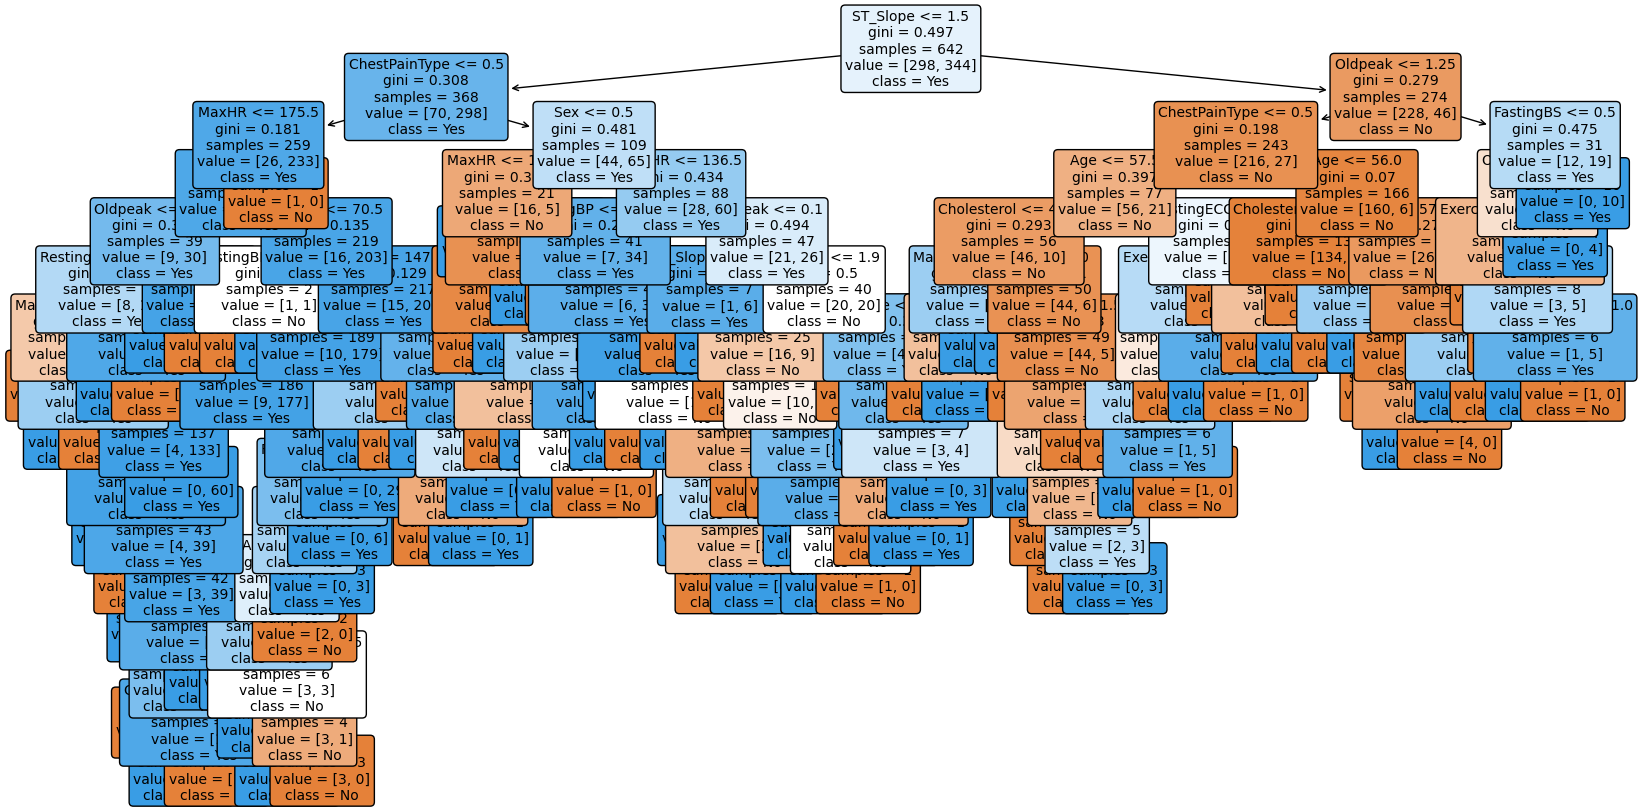

In [ ]:
from sklearn import tree # Mengimpor modul 'tree' dari library 'sklearn' untuk visualisasi pohon keputusan.
plt.figure(figsize=(20, 10)) # Membuat figure (area gambar) dengan ukuran 20x10 inci.
# Memvisualisasikan pohon keputusan menggunakan fungsi 'plot_tree'.
tree.plot_tree(model, # Model pohon keputusan yang akan divisualisasikan.
               filled=True, # Mengisi node (kotak) dengan warna berdasarkan kelas mayoritas.
               rounded=True, # Membuat sudut node (kotak) menjadi bulat.
               feature_names=X.columns, # Menampilkan nama fitur pada setiap node keputusan.
               class_names=['No', 'Yes'], # Menampilkan nama kelas ('No' dan 'Yes') pada setiap node.
               fontsize=10) # Mengatur ukuran font teks dalam visualisasi.
plt.show() # Menampilkan visualisasi pohon keputusan.